<a href="https://colab.research.google.com/github/vijaykalmani/Dog-Breed-Identification/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanford Vision department, has collected and annotated images of 120 breeds of dogs from ImageNet. Dataset can be found here.
- Prepare an EDA sheet & explain what you understand from this data. What would be your approach? 
- With a limited number of training images per class, what extra steps will you incorporate for a good model? 
- Iterate over and try different architecture and topologies and preserve the results of each experiment using TensorBoard. Also, save major metrics in an Excel (or try W&B). 


In [2]:
# GENERAL LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# SUPPRESS WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Dog_breed/dog-breed

/content/drive/MyDrive/Dog_breed/dog-breed


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Dog_breed/dog-breed/"

In [6]:
ls

labels.csv  sample_submission.csv  test/  train/


In [7]:
#Importing the Required Libraries
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

def load_dataset(path):
  data = load_files(path)
  dog_files = np.array(data['labels.csv'])
  dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
  return dog_files, dog_targets

In [8]:
dog_files

NameError: ignored

In [ ]:
#importing the csv file
df = pd.read_csv("labels.csv", header='infer', error_bad_lines=False)

In [ ]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
print(df['breed'].unique())
print(len(df['breed'].unique()))

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'airedale' 'leonberg' 'mexican_h

In [ ]:
df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
df.isnull().sum()

id       0
breed    0
dtype: int64

In [ ]:
df.shape

(10222, 2)

In [ ]:
#id replace with image path

path = "/content/drive/MyDrive/Dog_breed/dog-breed/train/"
df['id'] = df['id'].apply(lambda row: path + str(row) + '.jpg')

In [ ]:
df.head()

,id,breed
0,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,boston_bull
1,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,dingo
2,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,pekinese
3,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,bluetick
4,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,golden_retriever


In [ ]:
df['id'][30]

'/content/drive/MyDrive/Dog_breed/dog-breed/train/00ca18751837cd6a22813f8e221f7819.jpg'

In [ ]:
#Encoding the breed columns 
breed=df['breed'].value_counts().reset_index()

In [ ]:
breed['index'].unique()

array(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed', 'airedale', 'tibetan_terrier', 'leonberg',
       'cairn', 'beagle', 'japanese_spaniel', 'australian_terrier',
       'blenheim_spaniel', 'miniature_pinscher', 'irish_wolfhound',
       'lakeland_terrier', 'saluki', 'papillon', 'norwegian_elkhound',
       'whippet', 'siberian_husky', 'pug', 'chow', 'italian_greyhound',
       'pembroke', 'ibizan_hound', 'border_terrier', 'newfoundland',
       'lhasa', 'silky_terrier', 'dandie_dinmont', 'bedlington_terrier',
       'sealyham_terrier', 'irish_setter', 'rhodesian_ridgeback',
       'old_english_sheepdog', 'collie', 'boston_bull', 'schipperke',
       'bouvier_des_flandres', 'kelpie', 'english_foxhound',
       'african_hunting_dog', 'bloodhound', 'bluetick', 'weimaraner',
       'saint_bernard', 'labrador_retriever', 'english_setter',
       'chesapeake_bay_ret

In [ ]:
classes=sorted(list(set(df['breed'])))
n_classes=len(classes)
class_to_num=dict(zip(classes,range(n_classes)))
class_to_num

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
df['breed']=df['breed'].map(class_to_num)
df.head()

,id,breed
0,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,19
1,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,37
2,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,85
3,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,15
4,/content/drive/MyDrive/Dog_breed/dog-breed/tra...,49


In [ ]:
# OPEN CV
#!pip install opencv-python

import cv2

In [ ]:
cv2.imread('/content/drive/MyDrive/Dog_breed/dog-breed/train/00ca18751837cd6a22813f8e221f7819.jpg').shape

(338, 450, 3)

In [ ]:
X = []
counter = 0
for path in df['id']:
    counter += 1
    if counter % 1000 == 0:
        print(counter, end=" ")
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X.append(img)

1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(10222,)

In [ ]:
Y = df['breed'].values

In [ ]:
print("Dimension of the images: ", X[0].shape)

Dimension of the images:  (375, 500, 3)


In [ ]:
print(X[0].shape)
print(Y.shape)

(375, 500, 3)
(10222,)


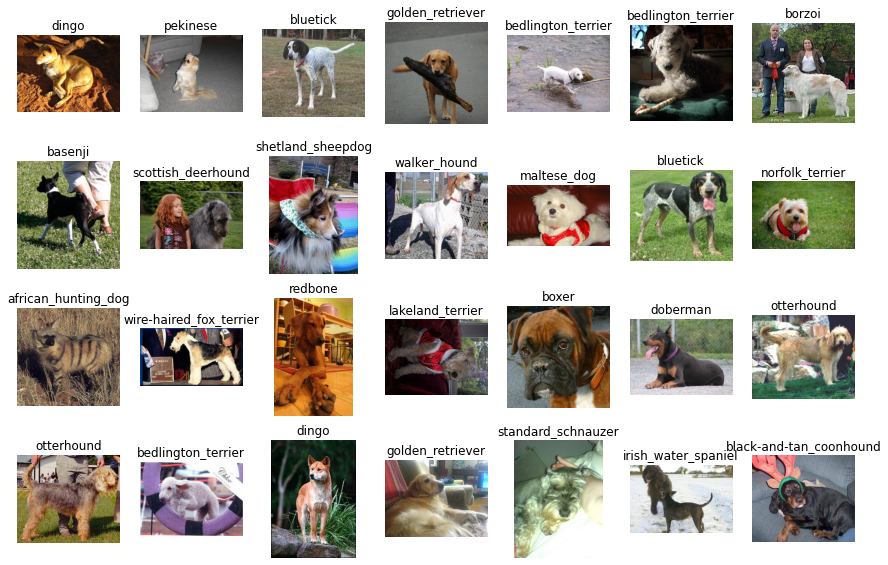

In [ ]:
# LETS VISUALIZE SOME SAMPLES

fig = plt.figure(figsize=(15, 10))

c = 7
r = 4

for i in range(1, c * r + 1):
#     print(i)
    img = X[i]
    fig.add_subplot(r, c, i)
    plt.imshow(img)
    plt.title(classes[Y[i]])
    plt.axis('off')
    
plt.show()
    
    

In [ ]:
# CONVERT RGB IMAGES TO GRAYSCALE IMAGES
X_grey = np.array([cv2.cvtColor(images, cv2.COLOR_RGB2GRAY) for images in X])

NameError: ignored

In [ ]:
print("Dimension of images: ", X_grey[0].shape)

Dimension of images:  (375, 500)


In [ ]:
# TRAIN A VANILLA NEURAL NETWORK
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization

In [ ]:
model = Sequential([Flatten(input_shape=(375,500)), 
                   Dense(128, activation='relu'),
                   BatchNormalization(),
                   Dense(128, activation='relu'),
                   BatchNormalization(),
                   Dense(64, activation='relu'),
                   Dense(4, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 187500)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               24000128  
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
OneHot = tf.keras.utils.to_categorical(Y)
print("Dimension of Y: ", OneHot.shape)
print("One Hot Vector: ", OneHot[0])

Dimension of Y:  (10222, 120)
One Hot Vector:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# TRAIN AND VALIDATION SPLIT

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_grey, OneHot, test_size=0.2, random_state=1904)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8177,) (2045,) (8177, 120) (2045, 120)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
history = model.fit(X_train, y_train,batch_size=64,epochs=2, validation_data=[X_test, y_test])

ValueError: ignored